# Chapter 5. Nonlinear models

In [10]:
library(earth)

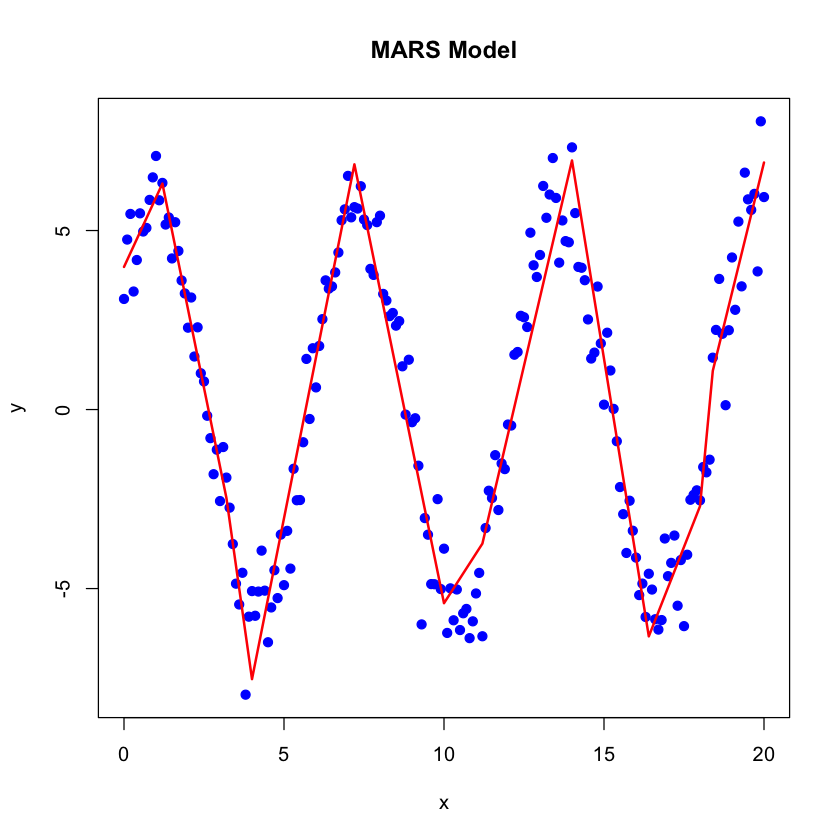

In [11]:
#simulate some example data
set.seed(372)
x = seq(0,20,by=0.1)
y = 5*sin(x) + 3*cos(x)+rnorm(length(x))

#create a data frame
dat = data.frame(x=x,y=y)

#Fit a MARS model
mars_fit = earth(y~x,data=dat)

#summary of the fit
#summary(mars_fit)

#Make predictions using the MARS model
new_data = data.frame(x=seq(0,20,by=0.1))
predictions = predict(mars_fit,newdata=new_data)

#plot the original data and MARS predictions
plot(x,y, main = "MARS Model", xlab = "x", ylab = "y", pch =19,col = "blue")
lines(new_data$x,predictions, col = "red", lwd = 2)


In [13]:
# use mars to build a model to predict "house price" using other variables in the "Boston" dataset
#build a neural net model to predict "medv" using all other features
library(MASS)
library(tidyverse)
library(caret)

data(Boston)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [14]:
data= Boston


In [27]:
set.seed(252)

# transform the data
# boston.dat = Boston %>% mutate_all(scale.fun)
#split the data into training and testing set according to medv

index = createDataPartition(Boston$medv,p=0.8,list=FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


Call: earth(formula=medv~., data=train.dat)

                coefficients
(Intercept)       -26.251808
h(crim-3.56868)    11.823026
h(crim-3.8497)    -12.687553
h(crim-11.8123)     0.795316
h(indus-21.89)     -0.825814
h(nox-0.488)      -21.136093
h(rm-6.417)         7.814934
h(rm-7.923)        -7.857504
h(dis-1.4165)      61.261024
h(2.3158-dis)      64.405616
h(dis-2.3158)     -61.928928
h(243-tax)          0.088397
h(14.7-ptratio)     1.513448
h(ptratio-14.7)    -0.695848
h(392.69-black)    -0.004811
h(black-392.69)    -0.348244
h(5.98-lstat)       2.756739
h(lstat-5.98)      -0.456408

Selected 18 of 23 terms, and 9 of 13 predictors
Termination condition: Reached nk 27
Importance: rm, lstat, dis, ptratio, nox, crim, tax, indus, black, ...
Number of terms at each degree of interaction: 1 17 (additive model)
GCV 12.40884    RSS 4219.129    GRSq 0.8554116    RSq 0.8786144

 plotmo grid:    crim zn indus chas   nox    rm  age    dis rad tax ptratio
               0.2498  0  9.69    0 0.538 6.208 77.8 3.1323   5 330    19.1
  black lstat
 391.83 11.34


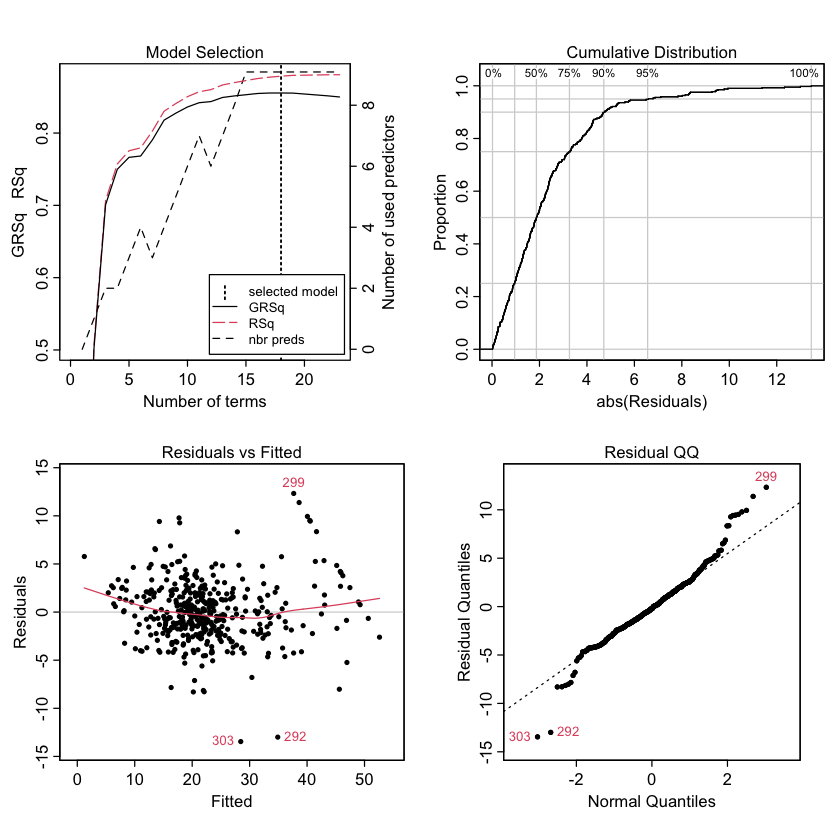

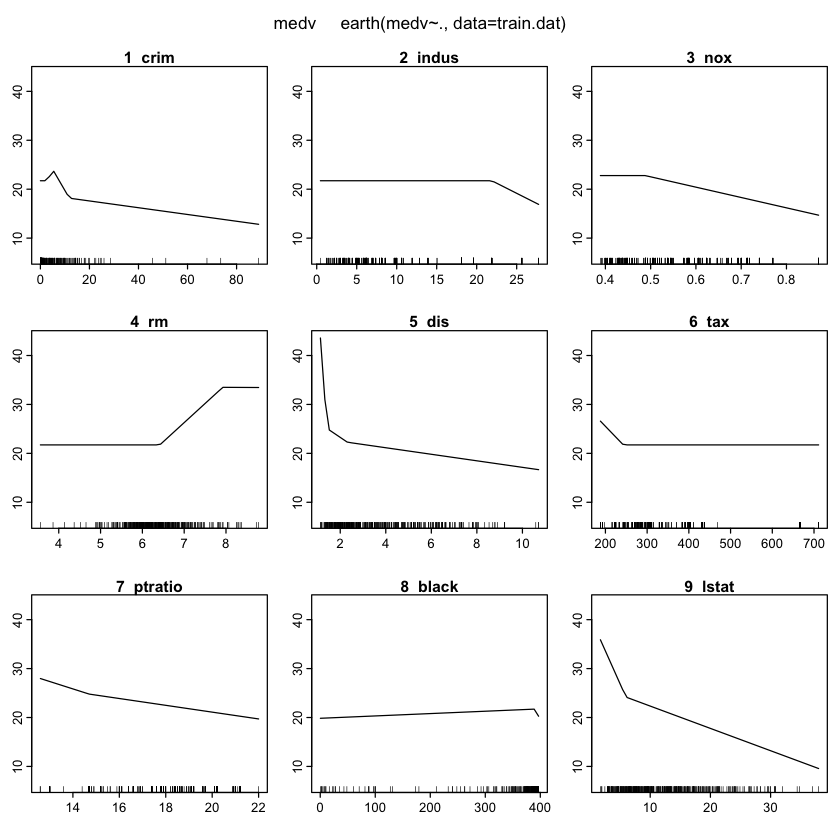

In [16]:
# fit a MARS model
mars_fit = earth(medv~., data=train.dat)
summary(mars_fit)

#model visualization : the effect of each variable 
#model diagnostics plot
plot(mars_fit,legend.pos ="bottomright",caption = "") 

# plot each fitted function holding other terms at their medians
plotmo(mars_fit, nrug = -1)

# for example : when nox is above 0.488, the effect of nox on medv is "-21.136??"
#when holding other variables fixed 

use "train" function to select the best hyper parameters
there are two crucial tuning hyper parameters : the maximum degree of interactions, and the number of terms in the final model. To determine the best combination of these hyperparameters, we need a grid search to minimize prediction error.

In [17]:
# model training using the caret package : train function 

set.seed(295)

#cross validation 
cv.control = trainControl(method = "cv", number = 6)

#create a tuning grid
#degree : the maximum degree of interactions : nprune : the number of terms in the model

hyper_grid = expand.grid(
    degree = 1:2,
     nprune = c(10,13,15,17,20)
     )

#train to find the optimal tuning parameters

mars.fit = train(medv~., data=train.dat, method = "earth", 
trControl = cv.control,
trace = FALSE,
tuneGrid = hyper_grid
#PreProc = c("center","scale")
#maxit = 500
)

In [18]:
mars.fit

#best tuning parameters
mars.fit$bestTune

Multivariate Adaptive Regression Spline 

407 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (6 fold) 
Summary of sample sizes: 339, 340, 338, 340, 339, 339, ... 
Resampling results across tuning parameters:

  degree  nprune  RMSE      Rsquared   MAE     
  1       10      4.029710  0.8138493  2.800669
  1       13      3.837058  0.8330866  2.682747
  1       15      3.822718  0.8334615  2.701992
  1       17      3.849014  0.8299345  2.756967
  1       20      3.843991  0.8301363  2.727077
  2       10      4.222557  0.7992307  2.855959
  2       13      4.255044  0.8018775  2.811392
  2       15      4.096457  0.8167485  2.702787
  2       17      3.915597  0.8284958  2.631488
  2       20      3.864868  0.8335457  2.565469

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 15 and degree = 1.

,nprune,degree
,<dbl>,<int>
3,15,1


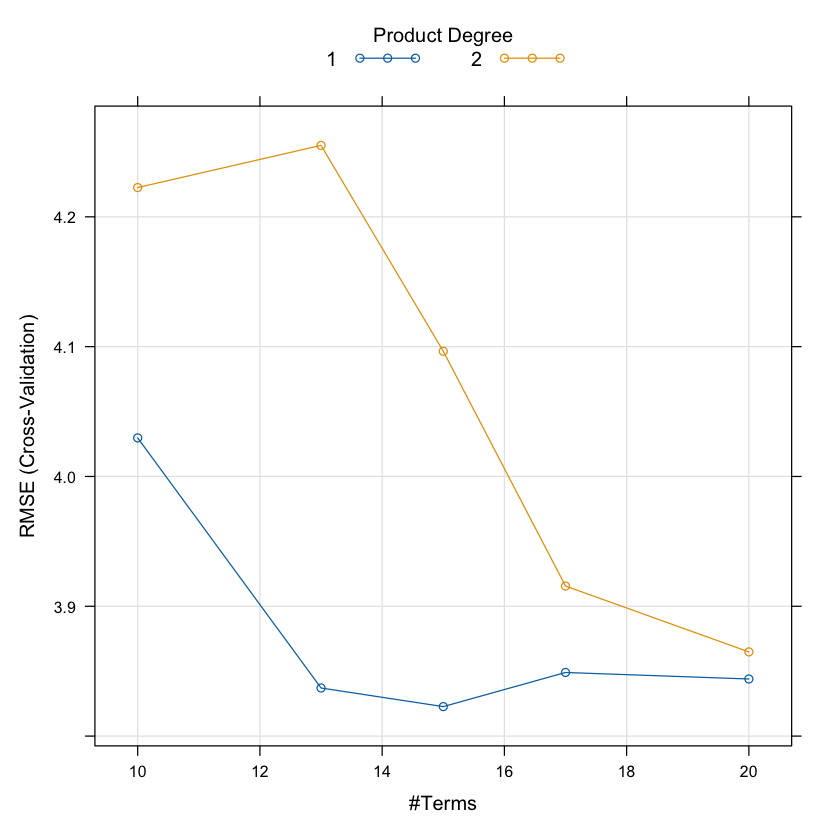

In [19]:
plot(mars.fit)

[1] 3.686706

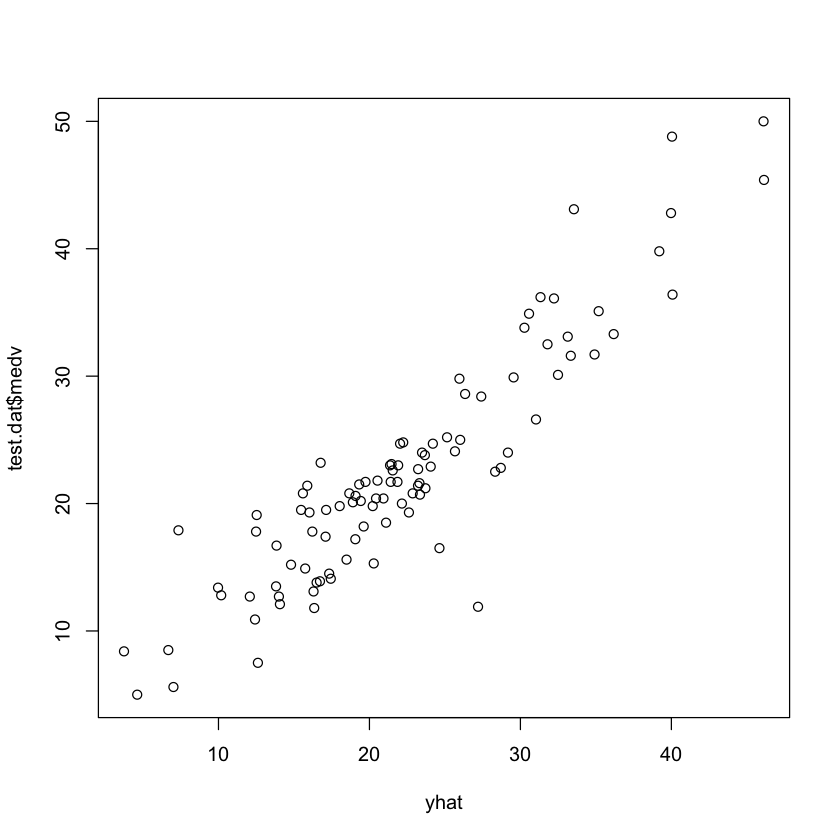

In [20]:
#make a prediction on the testing data

yhat=predict(mars.fit,test.dat)

#plot the predicted values against the true values
plot(yhat,test.dat$medv)

#RMSE on the testing data
caret::RMSE(yhat,test.dat$medv)